# Import libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy.signal as ss
import matplotlib
import matplotlib.pyplot as plt
import os

from mpdaf.obj import Cube
from mpdaf.sdetect import Source

from deblend import main_deblending

# Import data

In [5]:
fname='./data/udf_udf10_00072.fits'
src = Source.from_file(fname)

## Deblend 

In [9]:
# create main object initializing with the source
debl=main_deblending.Deblending(src)

#create the intensity maps using segmap in source (any 2d array can be used)
debl.createIntensityMap(segmap=src.images['HST_SEGMAP'].data)

# do the deblending. The following parameters are the default ones
# regul: use regularization or not

debl.findSources(regul=True)


/home/raphael/miniconda/envs/testodhin3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:639: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


## Explore results

### Segmap

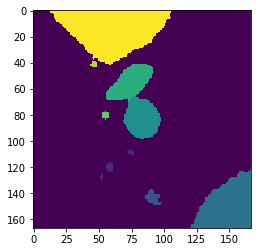

In [10]:
plt.imshow(debl.labelHR)

### Spectra

The list of spectra (calibrated in flux) is stored in debl.sources and their variances are stored in debl.varSources. It can also be obtained as a dict of mpdaf spectras with the HST IDs as keys using debl.getsp() (with the key 'bg' for the background spectrum).

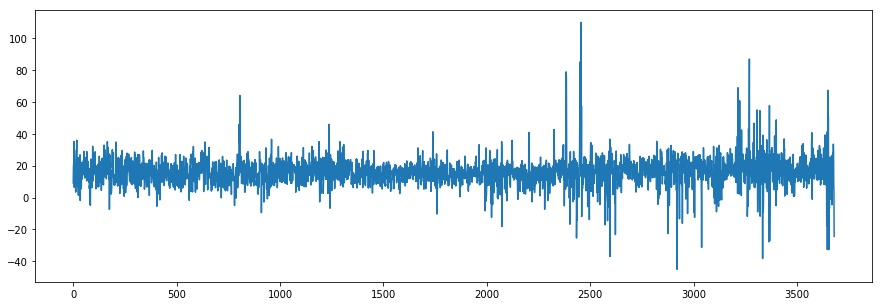

In [11]:
plt.figure(figsize=(15,5))
plt.plot(src.spectra['MUSE_WHITE_SKYSUB'].data)

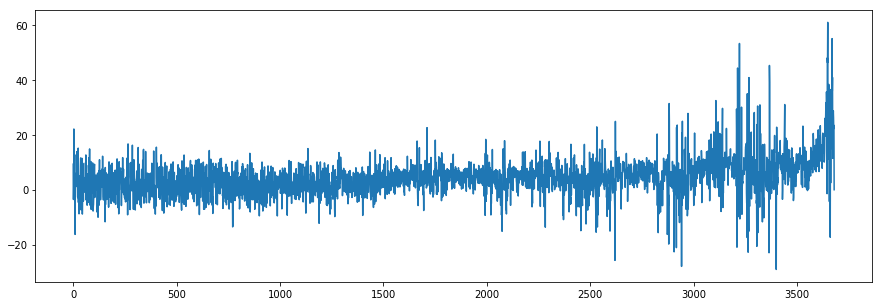

In [13]:
# Deblended spectrum of object 3
plt.figure(figsize=(15,5))
plt.plot(debl.sources[3])


### Intensity maps

The map of objects segmentation map with intern IDs is stored in debl.labelHR (nd array). The same with HST IDs is stored in debl.segmap

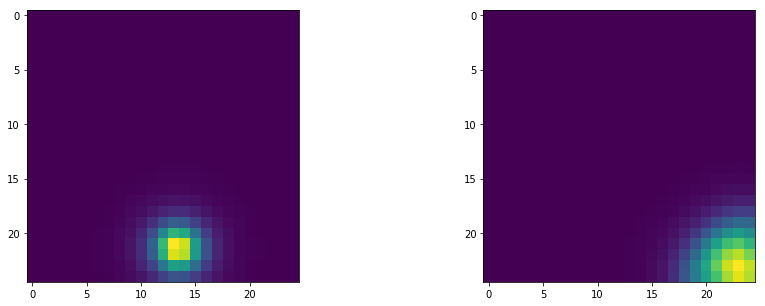

In [17]:
# Intensity map (at MUSE resolution) for object 2 and 3
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(debl.listIntensityMapLRConvol[0][1][2].reshape(debl.shapeLR))
plt.subplot(122)
plt.imshow(debl.listIntensityMapLRConvol[0][1][3].reshape(debl.shapeLR))

### Residuals

Residuals (data-reconstructed) are stored in debl.residuals, rebuilt cube is stored in cubeRebuilt

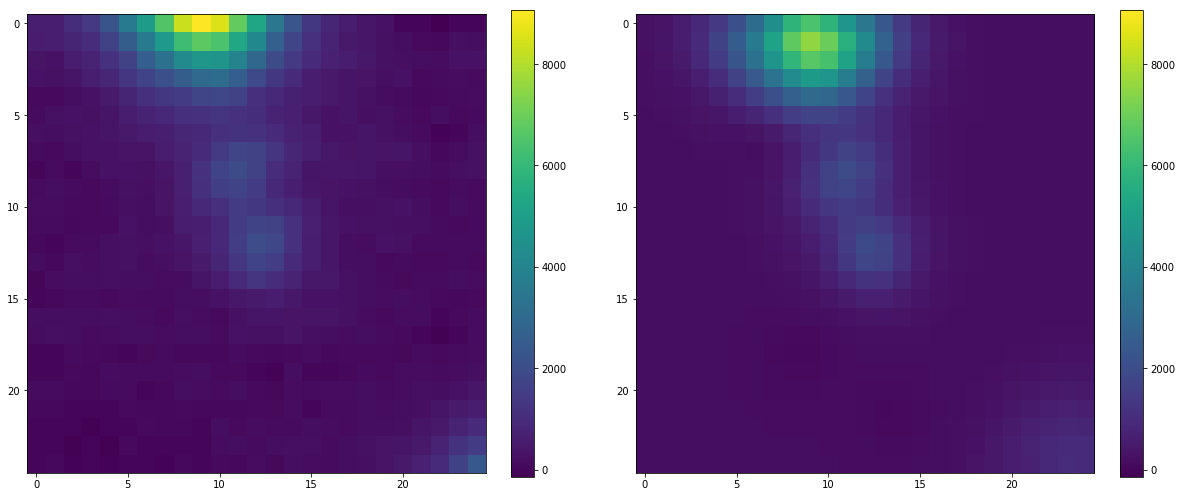

In [19]:
plt.figure(figsize=(20,10))
plt.subplot(121)
_min, _max = np.amin(debl.cubeLR.sum(axis=0)), np.amax(debl.cubeLR.sum(axis=0))
plt.imshow(debl.cubeLR.sum(axis=0),vmin=_min,vmax=_max)
plt.colorbar(fraction=0.046)
plt.subplot(122)
plt.imshow(debl.cubeRebuilt.sum(axis=0),vmin=_min,vmax=_max)
plt.colorbar(fraction=0.046)

## Analyze results

In [20]:
from deblend import eval_utils

In [22]:
print("Intercorrelation between the two main objects")
print("with regularization",eval_utils.calcInterCorr2(debl.sources[3],debl.sources[2]))


Intercorrelation between the two main objects
with regularization 0.184635359705
